# Credit Card Fraud Detection (CodSoft Internship Program)

* Name - Rajat Subhra Saha

## Introduction
* It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Problem Statement

* Build a machine learning model to identify fraudulent credit card
transactions.

## Source of Dataset

* We collected the dataset from Kaggle.com

## Size of Dataset

* Size of Credit Card Fraud Detection dataset is 4.62 kB

## Libraries Used
* Numpy
* Pandas
* Matplotlib
* Seaborn
* Sklearn

## Overview of the Features

* The dataset contains transactions made by credit cards in September 2013 by European cardholders.
* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

* It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

* Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Prediction Algorithm used:
* Logistic Regression
* RandomForestClassifier

## Data Preprocessing

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
271884,164796.0,-1.989422,2.310276,-1.789711,-0.731547,-0.664946,-0.986992,-0.431274,1.564119,-0.110936,...,-0.230986,-0.807183,0.209435,-0.670417,-0.148425,0.203535,0.078383,-0.001007,12.98,0
60525,49365.0,1.121078,0.136490,0.509031,1.327602,-0.247596,0.001118,-0.085944,0.158199,0.122637,...,-0.048987,0.042201,-0.035045,0.212967,0.584923,-0.339197,0.033312,0.005036,1.00,0
212854,139018.0,1.923547,-0.994556,-1.885667,-1.311199,1.566205,3.646900,-1.219220,0.971059,0.994947,...,0.183390,0.430190,0.213421,0.793221,-0.466066,1.286588,-0.073317,-0.055313,60.00,0


In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Type of each feature in dataset

In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Checking Missing values

In [10]:
(df.isnull().sum()/len(df))*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

## Checking duplicate values

In [11]:
df.duplicated().sum()

1081

## Exploratory Data Analysis

In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<Axes: xlabel='Class', ylabel='Amount'>

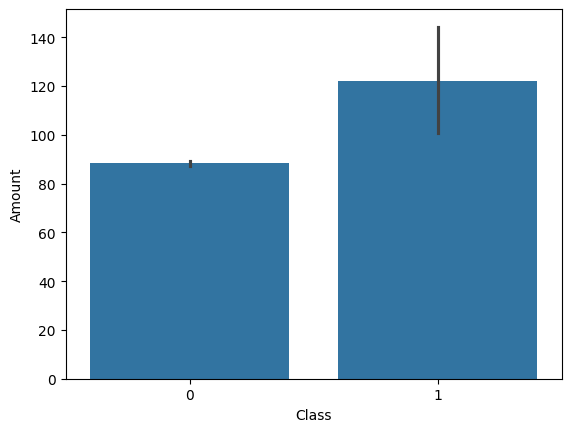

In [14]:
sns.barplot(x='Class',y='Amount',data=df)

In [15]:
normal=df[df.Class==0]

In [16]:
fraud=df[df.Class==1]

In [17]:
print(normal.shape)

(284315, 31)


In [18]:
print(fraud.shape)

(492, 31)


In [19]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
normal_sample=normal.sample(n=492)

In [22]:
new_file=pd.concat([normal_sample,fraud],axis=0)
new_file.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
60612,49404.0,0.274084,-1.435438,0.761169,1.513543,-1.407063,0.037451,-0.119657,0.126177,0.324908,...,0.429648,0.188147,-0.405187,0.315546,0.116556,-0.408378,-0.030074,0.105862,450.00,0
169139,119549.0,2.044354,-1.002685,-2.673341,-1.736622,1.782981,3.244116,-1.111425,0.848764,-0.400891,...,-0.306314,-1.142406,0.448251,0.542888,-0.517596,-0.660564,0.015225,-0.013585,69.00,0
99270,67045.0,1.294743,-0.007082,0.060772,-0.215321,-0.105683,-0.257366,-0.122574,-0.042653,-0.050699,...,-0.089472,-0.262735,-0.095251,-0.451157,0.353712,0.981553,-0.083700,-0.012221,10.00,0
65265,51505.0,1.249806,-0.878942,0.263971,-0.894499,-0.915550,-0.162738,-0.728302,0.060712,-0.783075,...,0.030714,-0.281303,-0.079571,-0.528794,0.266144,-0.383642,-0.008074,0.018852,93.65,0
145121,86652.0,-0.292976,1.173185,-0.203418,0.363740,1.613621,-0.680121,1.710069,-0.357234,-1.234263,...,0.236935,0.650426,-0.287709,0.624668,0.348368,-0.471094,0.118145,0.159453,34.90,0


In [23]:
new_file.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,86479.110772,-2.440926,1.773521,-3.504435,2.329241,-1.581608,-0.709984,-2.763919,0.250239,-1.305372,...,0.348581,-0.009770,-0.034969,-0.058094,0.025598,0.029566,0.104924,0.031658,113.356870,0.500000
std,47742.957132,5.563174,3.820916,6.222647,3.175982,4.219787,1.748600,5.891194,4.940922,2.304564,...,2.839142,1.174535,1.197972,0.566281,0.657154,0.470251,1.017531,0.488153,256.387527,0.500254
min,162.000000,-30.552380,-27.983104,-31.103685,-4.067605,-22.105532,-7.501200,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.286909,-7.263482,-6.098303,0.000000,0.000000
25%,46839.500000,-2.930014,-0.135198,-5.129049,0.029700,-1.826740,-1.530108,-3.107826,-0.199685,-2.353917,...,-0.158125,-0.546236,-0.233411,-0.405826,-0.307909,-0.282578,-0.071992,-0.058799,1.365000,0.000000
50%,77161.000000,-0.757454,0.951694,-1.300037,1.391904,-0.418103,-0.668849,-0.535717,0.140621,-0.694979,...,0.146475,0.005924,-0.036575,0.015381,0.050185,-0.010091,0.055024,0.039277,17.190000,0.500000
75%,134324.750000,1.019393,2.793742,0.344592,4.276079,0.473464,0.052915,0.288960,0.849822,0.151278,...,0.683621,0.556959,0.188424,0.360595,0.389751,0.322036,0.477727,0.220976,99.990000,1.000000
max,172050.000000,2.263924,22.057729,2.896970,12.114672,11.095089,7.568495,7.198959,20.007208,3.966169,...,27.202839,8.361985,5.466230,1.154893,2.208209,2.745261,3.833140,1.779364,2540.420000,1.000000


In [24]:
new_file.shape

(984, 31)

In [25]:
new_file['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [26]:
new_file.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92211.414634,-0.109903,-0.076737,0.024410,0.116452,-0.011991,-0.022232,0.040892,-0.070159,-0.029622,...,0.003052,-0.016427,-0.033589,-0.029629,-0.011057,0.009747,0.007485,0.039274,-0.012352,104.502419
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [27]:
x=new_file.drop(columns='Class',axis=1)
y=new_file['Class']

In [28]:
# Split the data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=100)

In [29]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred = log.predict(x_test)

In [31]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [32]:
y_test

223572    1
88307     1
219633    0
249607    1
229712    1
         ..
109154    0
83053     1
196062    0
230653    0
64679     0
Name: Class, Length: 197, dtype: int64

In [33]:
Test_data_acuracy = accuracy_score(y_pred,y_test)*100

In [34]:
print(f"Test Data Accuracy: {Test_data_acuracy}%")

Test Data Accuracy: 91.87817258883248%


# OR

In [35]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [37]:
y_test

223572    1
88307     1
219633    0
249607    1
229712    1
         ..
109154    0
83053     1
196062    0
230653    0
64679     0
Name: Class, Length: 197, dtype: int64

In [38]:
Test_Data =accuracy_score(y_pred,y_test)*100
print(f"Test Data Accuracy: {Test_Data}%")

Test Data Accuracy: 94.41624365482234%


In [39]:
Test_Data_CM= confusion_matrix(y_pred,y_test)
print(Test_Data_CM)

[[105  10]
 [  1  81]]


In [40]:
Test_Data_cls_rpt = classification_report(y_pred,y_test)
print(Test_Data_cls_rpt)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       115
           1       0.89      0.99      0.94        82

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197

